In [1]:
# Boring preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from __future__ import division

# %pylab inline causes numpy.sum() overriding builtin's sum(). 
import builtins as base

Populating the interactive namespace from numpy and matplotlib


In [2]:
# save space
import gzip
with gzip.open('./big.txt.gz', 'rt') as f:
    TEXT = f.read()

len(TEXT)

6488666

In [3]:
def tokens(text):
    "List all the word tokens (consecutive letters) in a text. Normalize to lowercase."
    return re.findall('[a-z]+', text.lower()) 

In [4]:
tokens('This is: A test, 1, 2, 3, this is.')

['this', 'is', 'a', 'test', 'this', 'is']

In [5]:
WORDS = tokens(TEXT)
len(WORDS)

1105285

In [6]:
print(WORDS[:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'adventures', 'of', 'sherlock', 'holmes']


In [7]:
def sample(bag, n=10):
    "Sample a random n-word sentence from the model described by the bag of words."
    return ' '.join(random.choice(bag) for _ in range(n))

In [8]:
sample(WORDS)

'lactate of and the seventy who growth now at rostov'

In [9]:
Counter(tokens('Is this a test? It is a test!'))

Counter({'a': 2, 'is': 2, 'it': 1, 'test': 2, 'this': 1})

In [10]:
COUNTS = Counter(WORDS)

print(COUNTS.most_common(10))

[('the', 80030), ('of', 40025), ('and', 38313), ('to', 28766), ('in', 22050), ('a', 21155), ('that', 12512), ('he', 12401), ('was', 11410), ('it', 10681)]


In [11]:
for w in tokens('the rare and neverbeforeseen words'):
    print(COUNTS[w], w)

80030 the
83 rare
38313 and
0 neverbeforeseen
460 words


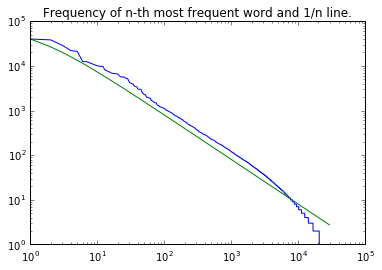

In [12]:
M = COUNTS['the']
yscale('log'); xscale('log'); title('Frequency of n-th most frequent word and 1/n line.')
plot([c for (w, c) in COUNTS.most_common()])
plot([M/i for i in range(1, len(COUNTS)+1)]);

In [13]:
cands = ['actress', 'cress', 'caress', 'access', 'across', 'acres']
pairs = [(w, COUNTS[w]) for w in cands]
for pair in pairs:
    print('{}: {}'.format(pair[0], pair[1]))

actress: 7
cress: 0
caress: 3
access: 56
across: 222
acres: 36


In [14]:
print('across / access in the bigw corpus =', 222.0 / 56)
print('across / access in the COCA corpus =', 120844.0 / 37038)

across / access in the bigw corpus = 3.9642857142857144
across / access in the COCA corpus = 3.2627031697175872


In [15]:
base.sum(COUNTS.values())

1105285

In [16]:
def pdist(counter):
    "Make a probability distribution, given evidence from a Counter."
    N = int(base.sum(counter.values()))
    return lambda x: counter[x]/N

P = pdist(COUNTS)

In [17]:
for w in cands:
    print('P({}) \t= {:8.6e}'.format(w, P(w)))

P(actress) 	= 6.333208e-06
P(cress) 	= 0.000000e+00
P(caress) 	= 2.714232e-06
P(access) 	= 5.066567e-05
P(across) 	= 2.008532e-04
P(acres) 	= 3.257078e-05


In [18]:
def known(words):
    "Return the subset of words that are actually in the dictionary."
    return {w for w in words if w in COUNTS}

def edits0(word): 
    "Return all strings that are zero edits away from word (i.e., just word itself)."
    return {word}

def edits2(word):
    "Return all strings that are two edits away from this word."
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

In [19]:
def edits1(word):
    "Return all strings that are one edit away from this word."
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet if b]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)

def splits(word):
    "Return a list of all possible (first, rest) pairs that comprise word."
    return [(word[:i], word[i:]) 
            for i in range(len(word)+1)]

alphabet = 'abcdefghijklmnopqrstuvwxyz'

In [20]:
splits('wird')

[('', 'wird'), ('w', 'ird'), ('wi', 'rd'), ('wir', 'd'), ('wird', '')]

In [21]:
print(edits0('wird'))

{'wird'}


In [22]:
print(edits1('wird'))

{'wdird', 'wirrd', 'qird', 'wzird', 'wirx', 'wibd', 'wirfd', 'wirdx', 'wiprd', 'wirb', 'wierd', 'wimrd', 'zwird', 'wird', 'wirc', 'wirid', 'nwird', 'wfrd', 'wprd', 'wrrd', 'wwrd', 'wirde', 'kird', 'wsrd', 'wirdh', 'wirhd', 'wirdp', 'wirt', 'wjrd', 'wqrd', 'wigrd', 'qwird', 'wpird', 'cwird', 'wirnd', 'wirpd', 'oird', 'kwird', 'wvrd', 'wiro', 'wyrd', 'bird', 'wired', 'wirxd', 'ywird', 'wirv', 'wyird', 'wmird', 'pird', 'wirdw', 'wiyd', 'pwird', 'winrd', 'wuird', 'wirdg', 'wxrd', 'wcird', 'wtird', 'wiard', 'wiud', 'wimd', 'wirwd', 'awird', 'wirds', 'wijd', 'wixd', 'wmrd', 'wifrd', 'wir', 'wirdi', 'wiord', 'wirdq', 'wnrd', 'wirdu', 'jird', 'weird', 'gird', 'wicd', 'wrid', 'wiry', 'waird', 'wirod', 'wirdt', 'wizd', 'wgird', 'wibrd', 'widr', 'wiid', 'wkrd', 'mwird', 'vwird', 'xird', 'wixrd', 'wiru', 'wirdm', 'wiri', 'wirdf', 'wirsd', 'wiryd', 'wiod', 'wirdz', 'wlird', 'wgrd', 'wirf', 'wiad', 'wihd', 'gwird', 'wirdc', 'lwird', 'wirzd', 'yird', 'uird', 'wire', 'wirdb', 'mird', 'wipd', 'wirw', '

In [23]:
print(len(edits2('wird')))

24254


In [24]:
from math import exp

BETA = 1.0

def score(err, beta = BETA):
    return exp(-beta * err)

In [25]:
for b in [0.5, 1.0, 1.5, 2.0]:
    print('beta = {}\tscore(1) = {}\tscore(2) = {}'.format(b, score(1, b), score(2, b)))

beta = 0.5	score(1) = 0.6065306597126334	score(2) = 0.36787944117144233
beta = 1.0	score(1) = 0.36787944117144233	score(2) = 0.1353352832366127
beta = 1.5	score(1) = 0.22313016014842982	score(2) = 0.049787068367863944
beta = 2.0	score(1) = 0.1353352832366127	score(2) = 0.01831563888873418


In [26]:
import nltk

words=re.compile('.*[A-Za-z0-9].*')
filtered=[w for w in WORDS if words.match(w)]
pairs=nltk.bigrams(filtered)
fdist=nltk.FreqDist(pairs)

To implement bigram language model, we need to get bigram words and count their frequency.

In [27]:
def get_bigram(raw):
    words=re.compile('.*[A-Za-z0-9].*')
    filtered=[w for w in WORDS if words.match(w)]
    pairs=nltk.bigrams(filtered)
    fdist=nltk.FreqDist(pairs)
    
    return fdist

In [28]:
bigram_info = get_bigram(WORDS)

Now we can define the method to compute the prior using bigram language model(with add-1 smoothing).

In [55]:
def compute_bi_pro(cand):
    count = []
    for pair,c in bigram_info.items():
        if pair[0] == cand and pair[1] == cand:
            ##print(pair,c)
            count.append(c)
    N = COUNTS[cand]
    return (sum(count) + 1)/(N + len(bigram_info))

Test the probability using bigram language model

In [56]:
a = compute_bi_pro('the')
print(a)

4.35747884989e-06


In [57]:
COUNTS['the']

80030

In [58]:
DEBUG = True
def correct(word):
    "Find the best spelling correction for this word."
    if known([word]):
        print('Error: this function only works with words not in the dictionary.')
        return word
    
    # get the candidates that are <=2 distance away from word
    candidates = [(w, 1) for w in known(edits1(word))]
    candidates.extend([(w, 2) for w in known(edits2(word))])
    if len(candidates) == 0:
        print('Warning: no candidate found for {}. I do not know how to correct it.'.format(word))
        return word
    # general case
    
    best_cand = None
    best_prob = -1.0
    for cand, err in candidates:
        prob = compute_bi_pro(cand) * score(err)
        # debug
        if DEBUG:
            print('.. c = {} (err = {}) => Prob = {} <= prior = {}, likelihood = {}'.format(
                    cand, err, prob, P(cand), score(err)))
        
        if prob > best_prob: 
            best_cand = cand 
            best_prob = prob
    
    return best_cand

Now let us implement the correction procedure and find the best candidate

In [59]:
correct('tha')

.. c = than (err = 1) => Prob = 9.677039780181408e-07 <= prior = 0.0010911212945077513, likelihood = 0.36787944117144233
.. c = thaw (err = 1) => Prob = 9.707785429101824e-07 <= prior = 1.8094880505932859e-06, likelihood = 0.36787944117144233
.. c = the (err = 1) => Prob = 1.6030268842128207e-06 <= prior = 0.07240666434449033, likelihood = 0.36787944117144233
.. c = ta (err = 1) => Prob = 2.912304888191344e-06 <= prior = 5.428464151779858e-06, likelihood = 0.36787944117144233
.. c = thy (err = 1) => Prob = 9.706632783588365e-07 <= prior = 4.252296918894222e-05, likelihood = 0.36787944117144233
.. c = tea (err = 1) => Prob = 9.705096348617951e-07 <= prior = 9.680761070674079e-05, likelihood = 0.36787944117144233
.. c = th (err = 1) => Prob = 9.70653033945579e-07 <= prior = 4.614194529012879e-05, likelihood = 0.36787944117144233
.. c = tra (err = 1) => Prob = 9.707785429101824e-07 <= prior = 1.8094880505932859e-06, likelihood = 0.36787944117144233
.. c = that (err = 1) => Prob = 3.477094

'ha'

We can see the best candidate for 'the' is 'ha'